In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress

In [3]:
college_info = pd.read_csv('../data/Kmeans_assignment_data.csv')
college_salary = pd.read_csv('../data/College_Salaries.csv')

college_df = pd.merge(college_info,college_salary,how='inner',)
college_df = {'School Name': college_df['School Name'],
              'Private': college_df['Private'],
              'Apps': college_df['Apps'],
              'Accept': college_df['Accept'],
              'Tuition/Semester': college_df['Outstate'],
              'Personal Spending/Semester': college_df['Personal'],
              'Book Costs/Semester': college_df['Books'],
              'Room & Board/Semester': college_df['Room.Board'],
              'Early Career Pay': college_df['Early Career Pay'],
              'Mid-Career Pay': college_df['Mid-Career Pay'],
              '% STEM Degrees': college_df['% STEM Degrees'],
              '% Grad rate': college_df['Grad.Rate'] }
college_final_df = pd.DataFrame(college_df)
college_final_df['Total Cost/Semester'] = college_final_df[['Personal Spending/Semester', 'Tuition/Semester', 'Book Costs/Semester', 'Room & Board/Semester']].sum(axis=1)
college_final_df['Acceptance Rate'] = college_final_df['Accept'] / college_final_df['Apps']

college_final_df['Early Career Pay'] = college_final_df['Early Career Pay'].str.replace('$', '').str.replace(',','').astype(float)
college_final_df['Mid-Career Pay'] = college_final_df['Mid-Career Pay'].str.replace('$', '').str.replace(',','').astype(float)
college_final_df['% STEM Degrees'] = college_final_df['% STEM Degrees'].str.replace('%', '').astype(int)

college_final_df

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500.0,110800.0,7,60,13390,0.742169
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500.0,108000.0,8,56,20980,0.880146
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400.0,89200.0,11,54,16565,0.768207
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300.0,99400.0,20,59,19735,0.836930
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700.0,102000.0,1,15,13980,0.756477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Worcester Polytechnic Institute,Yes,2768,2314,15884,730,530,5370,89100.0,161000.0,86,82,22514,0.835983
449,Xavier University,Yes,1959,1805,11520,1250,600,4960,64400.0,112900.0,5,83,18330,0.921388
450,Xavier University of Louisiana,Yes,2097,1915,6900,781,617,4200,54200.0,102200.0,33,49,12498,0.913209
451,Yale University,Yes,10705,2453,19840,2115,630,6510,89700.0,168300.0,27,99,29095,0.229145


In [4]:
college_final_df.to_csv('../data/college_clean.csv',index=False, header=True)

Text(10000, 100000, 'y = 1.21x+42066.2')

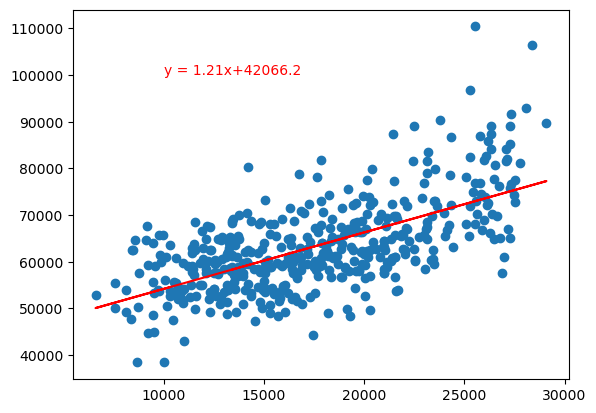

In [10]:
plt.scatter(college_final_df['Total Cost/Semester'], college_final_df['Early Career Pay'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(college_final_df['Total Cost/Semester'],college_final_df['Early Career Pay'])
regression_line = college_final_df['Total Cost/Semester']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.plot(college_final_df['Total Cost/Semester'],regression_line, color='red')
plt.annotate(line, (10000,100000),color='red')

Text(10000, 160000, 'y = 2.88x+62096.91')

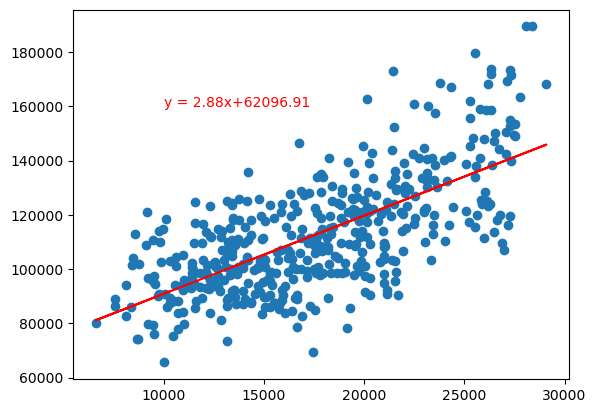

In [12]:
plt.scatter(college_final_df['Total Cost/Semester'], college_final_df['Mid-Career Pay'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(college_final_df['Total Cost/Semester'],college_final_df['Mid-Career Pay'])
regression_line = college_final_df['Total Cost/Semester']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.plot(college_final_df['Total Cost/Semester'],regression_line, color='red')
plt.annotate(line, (10000,160000),color='red')